<a href="https://colab.research.google.com/github/EeraboinaKeerthi/Supervised_Learning/blob/main/Netflix_DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# List the main "My Drive" folder
print(os.listdir('/content/drive/My Drive/'))

['Colab Notebooks', 'texas-application-employment.pdf', 'texas-application-employment (1).gdoc', 'texas-application-employment.gdoc', 'datasets']


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/datasets/netflix_data.csv')

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain
import seaborn as sns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
data.shape

(8807, 12)

In [10]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
data.isnull().sum().sort_values(ascending=False)


,0
director,2634
country,831
cast,825
date_added,10
rating,4
duration,3
show_id,0
type,0
title,0
release_year,0


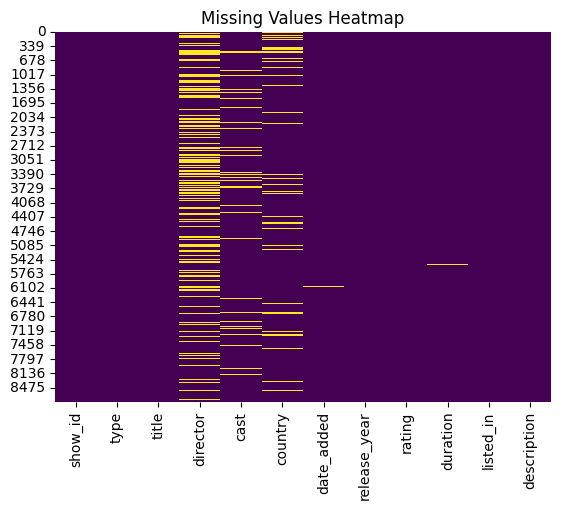

In [12]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

**Distribution between Movies and TV Shows?**

<Axes: title={'center': 'Type Distribution'}, xlabel='type'>

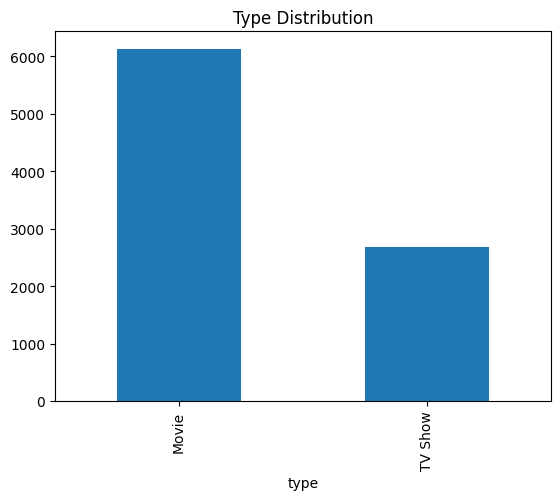

In [13]:
data['type'].value_counts().plot(kind='bar', title='Type Distribution')


<Axes: title={'center': 'Rating Distribution'}, xlabel='rating'>

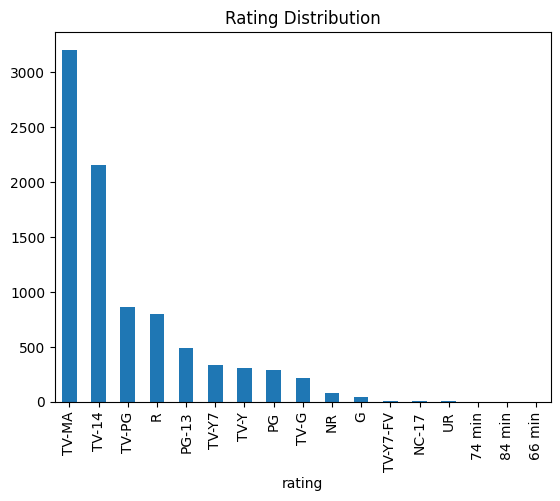

In [14]:
data['rating'].value_counts().plot(kind='bar', title='Rating Distribution')


<Axes: title={'center': 'Release Year Distribution'}, ylabel='Frequency'>

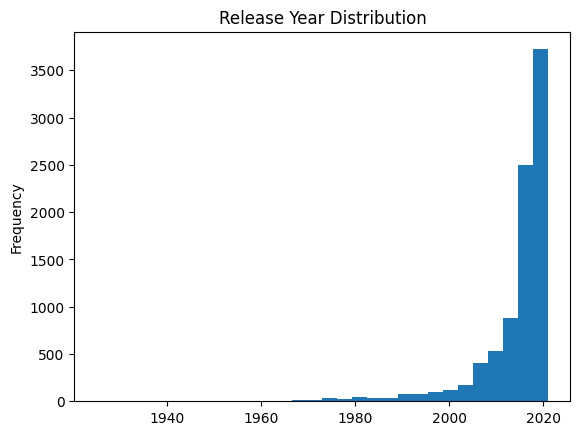

In [15]:
data['release_year'].plot(kind='hist', bins=30, title='Release Year Distribution')


**What are the top 10 most common genres?**

<Axes: title={'center': 'Top Genres'}, xlabel='listed_in'>

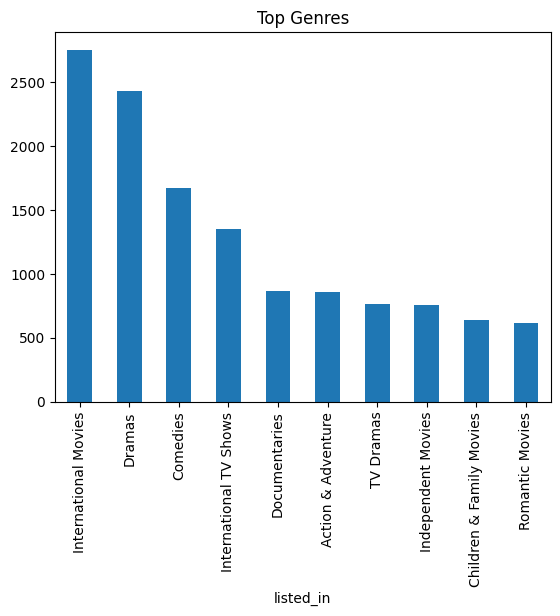

In [16]:
from collections import Counter

genres = data['listed_in'].dropna().str.split(', ')
genre_list = genres.explode()
genre_counts = genre_list.value_counts()
genre_counts.head(10).plot(kind='bar', title='Top Genres')


In [21]:
data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), errors='coerce')

data['date_added'].head(1)

,date_added
0,2021-09-25


**Which year had the most content added**

In [22]:
# Extract year from date_added
data['year_added'] = data['date_added'].dt.year

# Count content added per year
year_counts = data['year_added'].value_counts().sort_index()

# Display the year with the most additions
most_added_year = year_counts.idxmax()
most_added_count = year_counts.max()

print(f"The year with the most content added was {most_added_year}, with {most_added_count} titles.")

The year with the most content added was 2019.0, with 2016 titles.


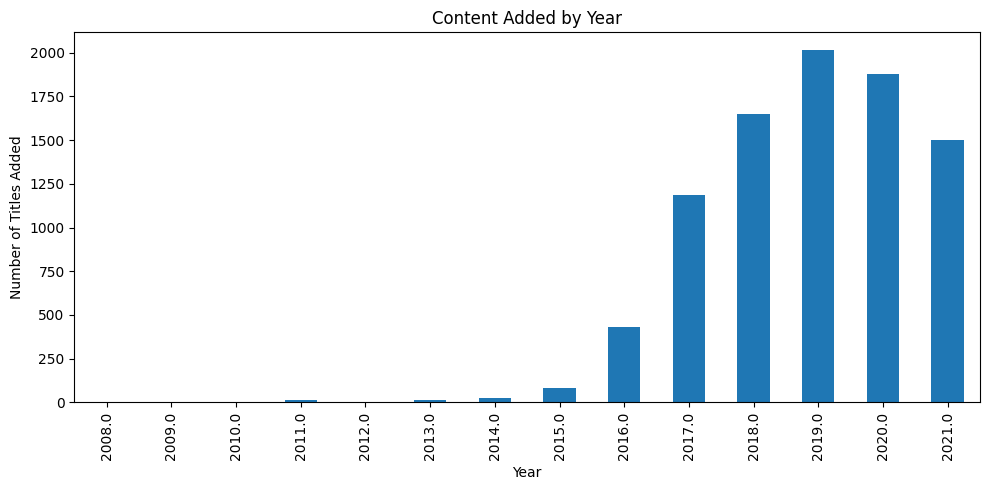

In [23]:
import matplotlib.pyplot as plt

year_counts.plot(kind='bar', figsize=(10, 5), title='Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.tight_layout()
plt.show()


**Which country produces the most content?**

In [24]:
country_data = data['country'].dropna()

# Split multiple countries and flatten into one list
country_split = country_data.str.split(', ')
country_exploded = country_split.explode()

# Count occurrences of each country
country_counts = country_exploded.value_counts()

# Display the top producer
top_country = country_counts.idxmax()
top_count = country_counts.max()

print(f"The country that produced the most content is {top_country} with {top_count} titles.")

The country that produced the most content is United States with 3689 titles.


**What are the top 10 content-producing countries?**





<Axes: title={'center': 'Top 10 Countries by Content'}, xlabel='country'>

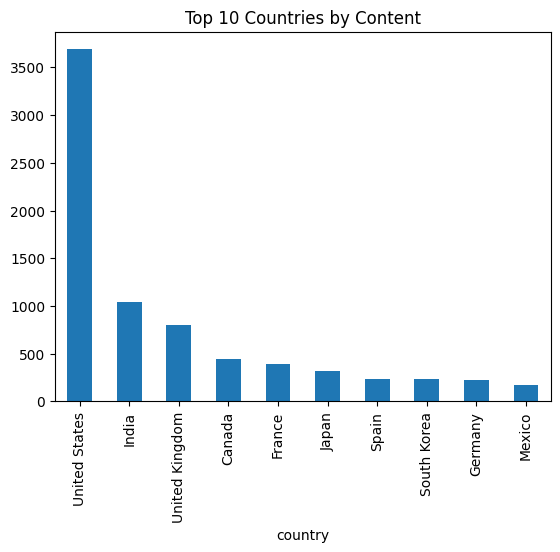

In [25]:

countries = data['country'].dropna().str.split(', ').explode()
countries.value_counts().head(10).plot(kind='bar', title='Top 10 Countries by Content')

**What is the most common duration of movies?**

<ipython-input-28-1055130694>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)


<Axes: title={'center': 'Most Common Movie Durations (mins)'}, xlabel='duration_mins'>

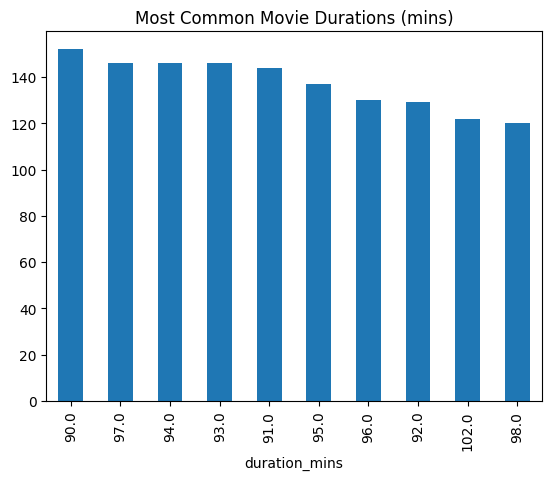

In [28]:
movies = data[data['type'] == 'Movie']
movies['duration_mins'] = movies['duration'].str.extract('(\d+)').astype(float)

movies['duration_mins'].value_counts().head(10).plot(kind='bar', title='Most Common Movie Durations (mins)')


**What is the average number of seasons for TV Shows?**

In [29]:
tv_shows = data[data['type'] == 'TV Show']
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

average_seasons = tv_shows['seasons'].mean()
print(f"Average number of seasons for TV Shows: {average_seasons:.2f}")


Average number of seasons for TV Shows: 1.76


<ipython-input-29-529264978>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


**Which directors have the most titles listed?**



<Axes: title={'center': 'Top 10 Directors by Number of Titles'}, ylabel='director'>

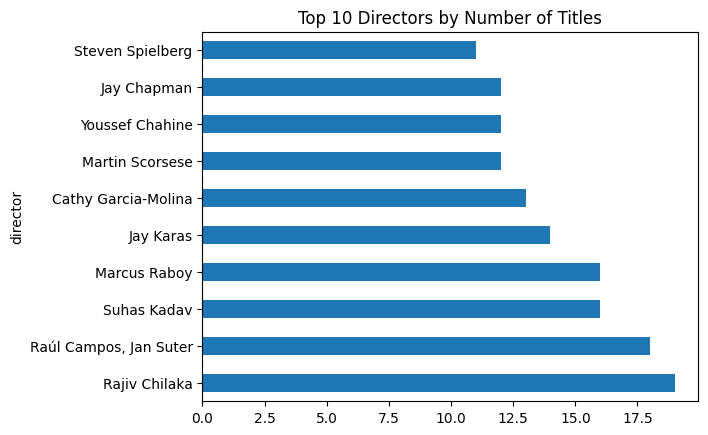

In [30]:
top_directors = data['director'].dropna().value_counts().head(10)
top_directors.plot(kind='barh', title='Top 10 Directors by Number of Titles')


**What’s the trend in content releases over the years?**

<Axes: title={'center': 'Content Released by Year'}, xlabel='release_year'>

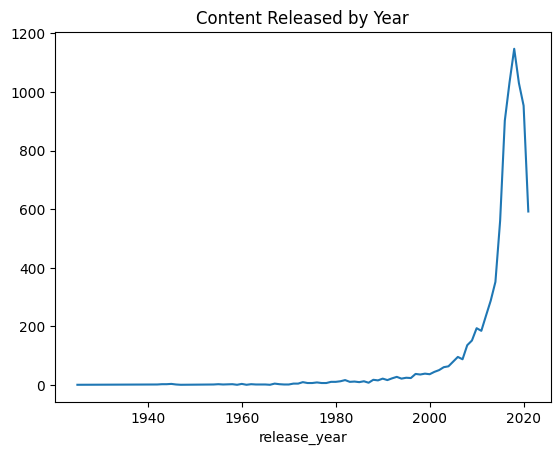

In [31]:
data['release_year'].value_counts().sort_index().plot(kind='line', title='Content Released by Year')


**Is there a pattern in how different ratings have changed over the years?**

<Axes: title={'center': 'Rating Trend Over Years'}, xlabel='release_year'>

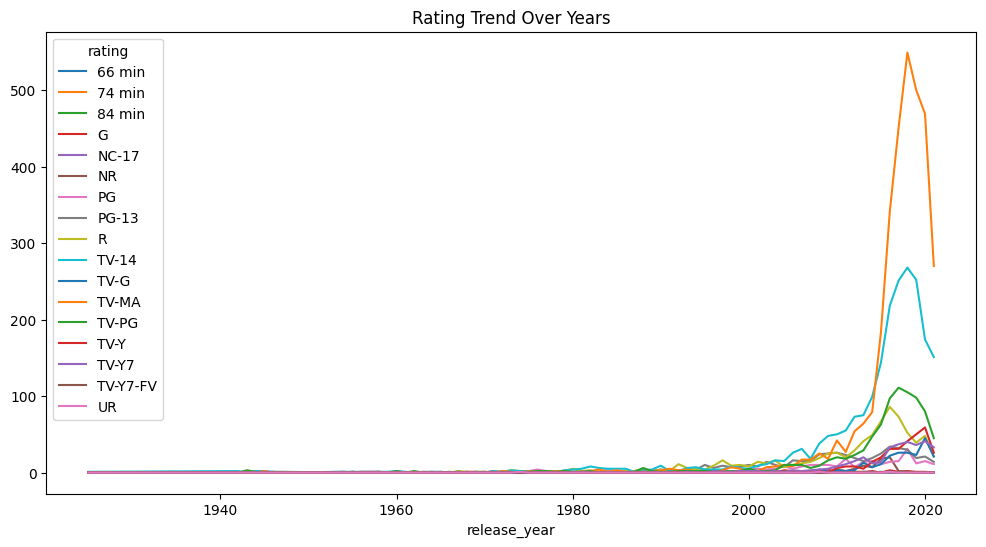

In [32]:
rating_trend = data.groupby(['release_year', 'rating']).size().unstack(fill_value=0)
rating_trend.plot(figsize=(12,6), title='Rating Trend Over Years')
